In [42]:
#Group 3 Project 3

In [43]:
#import dependancies
from pandasgui import show
from flask import Flask, jsonify
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido
from datetime import datetime, timedelta
import pandas as pd
from pathlib import Path
import psycopg2
import pandas.io.sql as sqlio
import numpy as np
import seaborn as sns
import scipy.stats as st


In [44]:
# Import database

con = psycopg2.connect(
database="imdb_top250_movies",
user="postgres",
password="postgres",
host="localhost",
port= '5432'
)

cursor_obj = con.cursor()
cursor_obj.execute("SELECT * FROM imdb_top250_movies")
result = cursor_obj.fetchall()
print('Result Set: ','\n', result)



Result Set:  
 [(1, 'The Shawshank Redemption', 1994, datetime.date(1994, 10, 14), '142 min', 'Crime, Drama', 'Frank Darabont', 'Stephen King (short story Rita Hayworth and Shawshank Redemption), Frank Darabont (screenplay)', 'Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler', 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', 'English', 'USA', 'Nominated for 7 Oscars. Another 19 wins & 30 nominations.', 80, 9.3, '1,825,626', 'Columbia Pictures'), (2, 'The Godfather', 1972, datetime.date(1972, 3, 24), '175 min', 'Crime, Drama', 'Francis Ford Coppola', 'Mario Puzo (screenplay), Francis Ford Coppola (screenplay), Mario Puzo (novel)', 'Marlon Brando, Al Pacino, James Caan, Richard S. Castellano', 'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.', 'English, Italian, Latin', 'USA', 'Won 3 Oscars. Another 23 wins & 27 nominations.', 100, 9.2, '1,24

In [45]:
# Convert Database to Pandas

df = pd.DataFrame(result, columns=['num', 'title', 'year', 'released', 'runtime', 'genre', 'director', 'writer', 'actors', 'plot', 'lanugage', 'country', 'awards', 'metascore', 'imdb_rating', 'imdb_votes', 'production'])

df.head()


,num,title,year,released,runtime,genre,director,writer,actors,plot,lanugage,country,awards,metascore,imdb_rating,imdb_votes,production
0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,Stephen King (short story Rita Hayworth and Sh...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",Columbia Pictures
1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,"1,243,444",Paramount Pictures
2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,"856,870",Paramount Pictures
3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,"1,802,351",Warner Bros. Pictures/Legendary
4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,96.0,8.9,"494,215",Criterion Collection


<font color='Green' size='7'>Do movies with higher runtimes or lower runtimes usually rate higher?</font>

In [46]:
#Do movies with higher runtimes or lower runtimes usually rate higher?

##Creating a new DataFrame for the question, sorting by runtime
longestdf = df.sort_values(by='runtime', ascending=True)
longestdf

,num,title,year,released,runtime,genre,director,writer,actors,plot,lanugage,country,awards,metascore,imdb_rating,imdb_votes,production
131,131,Finding Nemo,2003,2003-05-30,100 min,"Animation, Adventure, Comedy","Andrew Stanton, Lee Unkrich","Andrew Stanton (original story by), Andrew Sta...","Albert Brooks, Ellen DeGeneres, Alexander Goul...",After his son is captured in the Great Barrier...,English,USA,Won 1 Oscar. Another 49 wins & 64 nominations.,90.0,8.1,"756,517",Walt Disney Pictures
150,151,The Maltese Falcon,1941,1941-10-18,100 min,"Film-Noir, Mystery",John Huston,"John Huston (screenplay), Dashiell Hammett (ba...","Humphrey Bogart, Mary Astor, Gladys George, Pe...",A private detective takes on a case that invol...,English,USA,Nominated for 3 Oscars. Another 4 wins.,NaN,8.1,"122,177",Warner Bros.
191,192,Groundhog Day,1993,1993-02-12,101 min,"Comedy, Fantasy, Romance",Harold Ramis,"Danny Rubin (screenplay), Harold Ramis (screen...","Bill Murray, Andie MacDowell, Chris Elliott, S...",A weatherman finds himself inexplicably living...,"English, French, Italian",USA,Won 1 BAFTA Film Award. Another 5 wins & 10 no...,72.0,8.0,"474,776",Columbia Pictures
245,246,The Lost Weekend,1945,1946-01-01,101 min,"Drama, Film-Noir",Billy Wilder,"Charles R. Jackson (from the novel by), Charle...","Ray Milland, Jane Wyman, Phillip Terry, Howard...",The desperate life of a chronic alcoholic is f...,English,USA,Won 4 Oscars. Another 12 wins & 3 nominations.,NaN,8.0,"26,834",Paramount Pictures
166,167,Before Sunrise,1995,1995-01-27,101 min,"Drama, Romance",Richard Linklater,"Richard Linklater, Kim Krizan","Ethan Hawke, Julie Delpy, Andrea Eckert, Hanno...",A young man and woman meet on a train in Europ...,"English, German, French","USA, Austria, Switzerland",1 win & 7 nominations.,77.0,8.1,"202,165",Sony Pictures Home Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,161,The Princess Bride,1987,1987-10-09,98 min,"Adventure, Family, Fantasy",Rob Reiner,"William Goldman (book), William Goldman (scree...","Cary Elwes, Mandy Patinkin, Chris Sarandon, Ch...","While home sick in bed, a young boy's grandfat...",English,USA,Nominated for 1 Oscar. Another 7 wins & 8 nomi...,77.0,8.1,"314,262",20th Century Fox
52,53,WALL·E,2008,2008-06-27,98 min,"Animation, Adventure, Family",Andrew Stanton,"Andrew Stanton (original story by), Pete Docte...","Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi...","In the distant future, a small waste-collectin...",English,USA,Won 1 Oscar. Another 90 wins & 90 nominations.,94.0,8.4,"782,275",Walt Disney Pictures
129,129,Fargo,1996,1996-04-05,98 min,"Crime, Drama, Thriller","Joel Coen, Ethan Coen","Ethan Coen, Joel Coen","William H. Macy, Steve Buscemi, Peter Stormare...",Jerry Lundegaard's inept crime falls apart due...,English,"USA, UK",Won 2 Oscars. Another 79 wins & 59 nominations.,85.0,8.1,"490,860",MGM
158,159,The Grand Budapest Hotel,2014,2014-03-28,99 min,"Adventure, Comedy, Drama",Wes Anderson,"Stefan Zweig (inspired by the writings of), We...","Ralph Fiennes, F. Murray Abraham, Mathieu Amal...","The adventures of Gustave H, a legendary conci...","English, French","USA, Germany",Won 4 Oscars. Another 127 wins & 217 nominations.,88.0,8.1,"537,323",Fox Searchlight


In [47]:
##The runtime column didn't sort properly because the type was string and not integers
##Dropping the 'min' from runtime to make converting to integer type possible
longestdf['runtime'] = longestdf['runtime'].str.replace('min','').astype(int)

In [48]:
##Confirming that the runtime column is now an integer type
longestdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 131 to 61
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num          250 non-null    int64  
 1   title        250 non-null    object 
 2   year         250 non-null    int64  
 3   released     248 non-null    object 
 4   runtime      250 non-null    int32  
 5   genre        250 non-null    object 
 6   director     250 non-null    object 
 7   writer       249 non-null    object 
 8   actors       250 non-null    object 
 9   plot         250 non-null    object 
 10  lanugage     250 non-null    object 
 11  country      250 non-null    object 
 12  awards       245 non-null    object 
 13  metascore    177 non-null    float64
 14  imdb_rating  250 non-null    float64
 15  imdb_votes   250 non-null    object 
 16  production   250 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(12)
memory usage: 34.2+ KB


In [49]:
##Sorting by runtime correctly
longestdf = longestdf.sort_values(by='runtime')
longestdf

,num,title,year,released,runtime,genre,director,writer,actors,plot,lanugage,country,awards,metascore,imdb_rating,imdb_votes,production
103,103,The General,1926,1927-02-24,67,"Action, Adventure, Comedy","Clyde Bruckman, Buster Keaton","Buster Keaton, Clyde Bruckman, Al Boasberg (ad...","Buster Keaton, Marion Mack, Glen Cavender, Jim...",When Union spies steal an engineer's beloved l...,English,USA,2 wins & 1 nomination.,NaN,8.2,"58,327",United Artists Films
65,66,The Kid,1921,1921-02-06,68,"Comedy, Drama, Family",Charles Chaplin,Charles Chaplin,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...","The Tramp cares for an abandoned child, but ev...",English,USA,1 win.,NaN,8.3,"76,513",First National Pictures Inc.
238,239,The Nightmare Before Christmas,1993,1993-10-29,76,"Animation, Family, Fantasy",Henry Selick,Tim Burton (based on: a story and characters b...,"Danny Elfman, Chris Sarandon, Catherine O'Hara...","Jack Skellington, king of Halloween Town, disc...",English,USA,Nominated for 1 Oscar. Another 7 wins & 7 nomi...,NaN,8.0,"238,561",Touchstone Pictures
226,227,Rope,1948,1948-09-25,80,"Crime, Drama, Thriller",Alfred Hitchcock,"Hume Cronyn (adapted by), Patrick Hamilton (fr...","John Dall, Farley Granger, Edith Evanson, Doug...",Two young men strangle their inferior classmat...,English,USA,3 nominations.,NaN,8.0,"102,340",Warner Bros. Pictures
205,206,Before Sunset,2004,2004-07-30,80,"Drama, Romance",Richard Linklater,"Richard Linklater (screenplay), Julie Delpy (s...","Ethan Hawke, Julie Delpy, Vernon Dobtcheff, Lo...","Nine years after Jesse and Celine first met, t...","English, French",USA,Nominated for 1 Oscar. Another 9 wins & 29 nom...,90.0,8.0,"179,650",Warner Independent Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,The Godfather: Part II,1974,1974-12-20,202,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,"856,870",Paramount Pictures
146,147,Ben-Hur,1959,1960-01-29,212,"Adventure, Drama, History",William Wyler,"Lew Wallace (novel), Karl Tunberg (screenplay)","Charlton Heston, Jack Hawkins, Haya Harareet, ...",When a Jewish prince is betrayed and sent into...,English,USA,Won 11 Oscars. Another 16 wins & 13 nominations.,90.0,8.1,"175,529",MGM
64,65,Lawrence of Arabia,1962,1962-12-11,216,"Adventure, Biography, Drama",David Lean,"T.E. Lawrence (writings), Robert Bolt (screenp...","Peter O'Toole, Alec Guinness, Anthony Quinn, J...","The story of T.E. Lawrence, the English office...","English, Arabic, Turkish","UK, USA",Won 7 Oscars. Another 23 wins & 14 nominations.,100.0,8.3,"207,765",Columbia Pictures
54,55,Once Upon a Time in America,1984,1984-06-01,229,"Crime, Drama",Sergio Leone,"Harry Grey (novel), Leonardo Benvenuti (screen...","Robert De Niro, James Woods, Elizabeth McGover...",A former Prohibition-era Jewish gangster retur...,"English, Italian, French","Italy, USA",Nominated for 2 Golden Globes. Another 11 wins...,NaN,8.4,"239,391",Warner Home Video


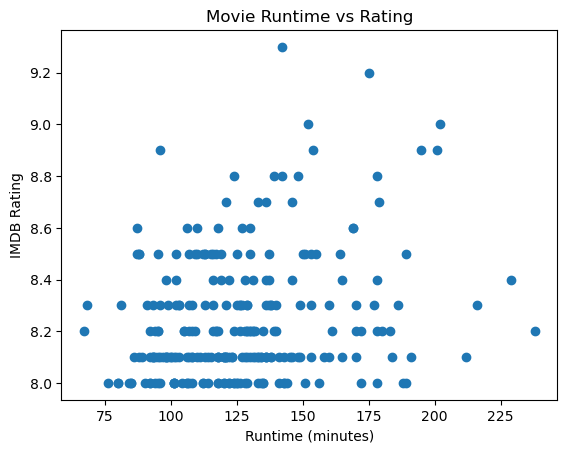

In [50]:
#Plotting the scatter plot of Movie Runtime vs Rating
plt.scatter(longestdf['runtime'], longestdf['imdb_rating'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.title('Movie Runtime vs Rating')
plt.savefig('Movie Runtime vs Rating.png')
plt.show()

In [51]:
#Calculating the correlation coefficient between runtime and imdb rating
runtime = longestdf['runtime']
rating = longestdf['imdb_rating']
ce = round(st.pearsonr(runtime, rating)[0],2)
print(f"correlation coefficient is {ce}")
## Based on the plot and the correlation coefficient calculated, we can determine that there is:
## A weak positive correlation between the runtime of movies in the Top 250 and their IMDB rating.

correlation coefficient is 0.25


<font color='Green' size='7'>Is there any relation between the number of imdb votes and the movie's imdb rating?</font>

In [52]:
##Is there any relation between the number of imdb votes and the movie's imdb rating?
imdbdf = df
imdbdf

,num,title,year,released,runtime,genre,director,writer,actors,plot,lanugage,country,awards,metascore,imdb_rating,imdb_votes,production
0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,Stephen King (short story Rita Hayworth and Sh...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",Columbia Pictures
1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,"1,243,444",Paramount Pictures
2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,"856,870",Paramount Pictures
3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,"1,802,351",Warner Bros. Pictures/Legendary
4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,96.0,8.9,"494,215",Criterion Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Lost Weekend,1945,1946-01-01,101 min,"Drama, Film-Noir",Billy Wilder,"Charles R. Jackson (from the novel by), Charle...","Ray Milland, Jane Wyman, Phillip Terry, Howard...",The desperate life of a chronic alcoholic is f...,English,USA,Won 4 Oscars. Another 12 wins & 3 nominations.,NaN,8.0,"26,834",Paramount Pictures
246,247,Short Term 12,2013,2013-08-23,96 min,Drama,Destin Daniel Cretton,Destin Daniel Cretton,"Brie Larson, John Gallagher Jr., Stephanie Bea...",A 20-something supervising staff member of a r...,English,USA,35 wins & 70 nominations.,82.0,8.0,"62,348",Cinedigm
247,248,His Girl Friday,1940,1940-01-18,92 min,"Comedy, Drama, Romance",Howard Hawks,"Charles Lederer (screen play), Ben Hecht (from...","Cary Grant, Rosalind Russell, Ralph Bellamy, G...",A newspaper editor uses every trick in the boo...,"English, French",USA,2 wins.,NaN,8.0,"43,551",Columbia Pictures
248,249,The Straight Story,1999,1999-11-03,112 min,"Biography, Drama",David Lynch,"John Roach, Mary Sweeney","Sissy Spacek, Jane Galloway Heitz, Joseph A. C...",An old man makes a long journey by lawn-mover ...,English,"France, UK, USA",Nominated for 1 Oscar. Another 14 wins & 37 no...,86.0,8.0,"67,045",Buena Vista Pictures


In [53]:
#Converting imdb_votes from object to float64 to match imdb_rating type
imdbdf['imdb_votes'] = imdbdf['imdb_votes'].str.replace(',','').astype('float')
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num          250 non-null    int64  
 1   title        250 non-null    object 
 2   year         250 non-null    int64  
 3   released     248 non-null    object 
 4   runtime      250 non-null    object 
 5   genre        250 non-null    object 
 6   director     250 non-null    object 
 7   writer       249 non-null    object 
 8   actors       250 non-null    object 
 9   plot         250 non-null    object 
 10  lanugage     250 non-null    object 
 11  country      250 non-null    object 
 12  awards       245 non-null    object 
 13  metascore    177 non-null    float64
 14  imdb_rating  250 non-null    float64
 15  imdb_votes   250 non-null    float64
 16  production   250 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 33.3+ KB


In [54]:
# Sorting movies by the number of imdb votes in descending order
imdbdf = imdbdf.sort_values(by='imdb_votes', ascending=False)
imdbdf

,num,title,year,released,runtime,genre,director,writer,actors,plot,lanugage,country,awards,metascore,imdb_rating,imdb_votes,production
0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,Stephen King (short story Rita Hayworth and Sh...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,1825626.0,Columbia Pictures
3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,1802351.0,Warner Bros. Pictures/Legendary
12,13,Inception,2010,2010-07-16,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","A thief, who steals corporate secrets through ...","English, Japanese, French","USA, UK",Won 4 Oscars. Another 150 wins & 203 nominations.,74.0,8.8,1592306.0,Warner Bros. Pictures
8,9,Fight Club,1999,1999-10-15,139 min,Drama,David Fincher,"Chuck Palahniuk (novel), Jim Uhls (screenplay)","Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier","An insomniac office worker, looking for a way ...",English,"USA, Germany",Nominated for 1 Oscar. Another 10 wins & 31 no...,66.0,8.8,1458676.0,20th Century Fox
7,8,Pulp Fiction,1994,1994-10-14,154 min,"Crime, Drama",Quentin Tarantino,"Quentin Tarantino (stories), Roger Avary (stor...","Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hit men, a boxer, a gangs...","English, Spanish, French",USA,Won 1 Oscar. Another 60 wins & 68 nominations.,94.0,8.9,1427451.0,Miramax Films
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,155,Brief Encounter,1945,1946-08-24,86 min,"Drama, Romance",David Lean,None,"Celia Johnson, Trevor Howard, Stanley Holloway...","Meeting a stranger in a railway station, a wom...",English,UK,Nominated for 3 Oscars. Another 3 wins.,NaN,8.1,28038.0,Universal Pictures
245,246,The Lost Weekend,1945,1946-01-01,101 min,"Drama, Film-Noir",Billy Wilder,"Charles R. Jackson (from the novel by), Charle...","Ray Milland, Jane Wyman, Phillip Terry, Howard...",The desperate life of a chronic alcoholic is f...,English,USA,Won 4 Oscars. Another 12 wins & 3 nominations.,NaN,8.0,26834.0,Paramount Pictures
217,218,A Night at the Opera,1935,1935-11-15,96 min,"Comedy, Music, Musical","Sam Wood, Edmund Goulding","George S. Kaufman (screen play), Morrie Ryskin...","Groucho Marx, Chico Marx, Harpo Marx, Kitty Ca...",A sly business manager and two wacky friends o...,"English, Italian",USA,1 win.,NaN,8.1,26025.0,MGM
187,188,Out of the Past,1947,1947-12-01,97 min,"Crime, Drama, Film-Noir",Jacques Tourneur,"Daniel Mainwaring (screenplay), Daniel Mainwar...","Robert Mitchum, Jane Greer, Kirk Douglas, Rhon...",A private eye escapes his past to run a gas st...,"English, American Sign Language",USA,1 win.,NaN,8.1,24842.0,WARNER BROTHERS PICTURES


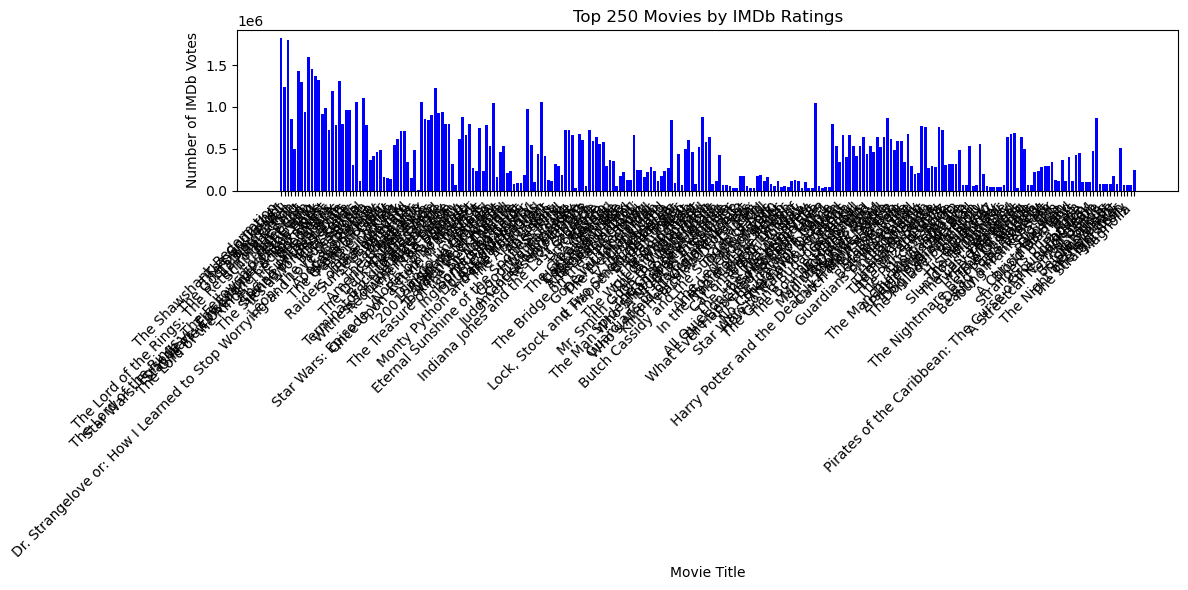

In [55]:
#Creating a function to plot the movies by Number of imdb votes
def plot_bar_chart(imdbdf, title_filter=None):
    plt.figure(figsize=(12, 6))

    if title_filter:
        filtered_df = imdbdf[imdbdf['title'].str.contains(title_filter, case=False)]
    else:
        filtered_df = imdbdf

    filtered_df = filtered_df.sort_values(by='imdb_rating', ascending=False).head(250)

    plt.bar(filtered_df['title'], filtered_df['imdb_votes'], color='blue')
    plt.xlabel('Movie Title')
    plt.ylabel('Number of IMDb Votes')
    plt.title('Top 250 Movies by IMDb Ratings')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#Running the function
plot_bar_chart(imdbdf)

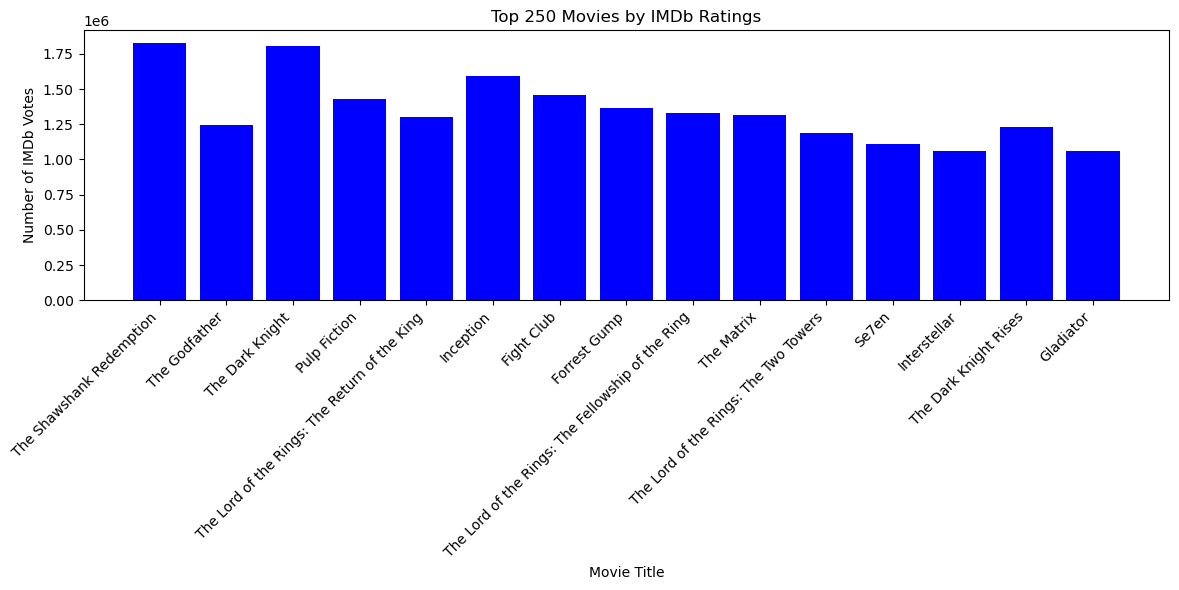

<Figure size 640x480 with 0 Axes>

In [56]:
#Creating a smaller dataframe to reduce visual clutter
small_df = imdbdf.head(15)

plot_bar_chart(small_df)
plt.savefig('IMDB_vote.png')

In [57]:
#Calculating correlation coefficient for imdb ratings and imdb votes
imdb_rating = imdbdf['imdb_rating']
votes = imdbdf['imdb_votes']
ce2 = round(st.pearsonr(imdb_rating, votes)[0],2)
print(f"correlation coefficient is {ce2}")

## The correlation coefficient shows that there is a statistically significant positive correlation between the number of imdb votes a movie receives and how highly it is rated.

correlation coefficient is 0.66


<font color='Green' size='7'>How many movies of the same series appear in the top 250</font>

In [58]:
# How many movies of the same series appear in the top 250
target_strings = ['Terminator','Star Wars','Toy Story','Alien','Dark Knight','Batman','Lord of the Rings','The Godfather']
movies_in_series = []

for n in df['title']:
    if any(target in n for target in target_strings):
        movies_in_series.append(n)

movies_in_series

['The Godfather',
 'The Godfather: Part II',
 'The Dark Knight',
 'The Lord of the Rings: The Return of the King',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Star Wars: Episode V - The Empire Strikes Back',
 'The Lord of the Rings: The Two Towers',
 'Star Wars: Episode IV - A New Hope',
 'Terminator 2: Judgment Day',
 'Alien',
 'The Dark Knight Rises',
 'Aliens',
 'Star Wars: Episode VI - Return of the Jedi',
 'Toy Story 3',
 'Toy Story',
 'Batman Begins',
 'Star Wars: The Force Awakens',
 'The Terminator']

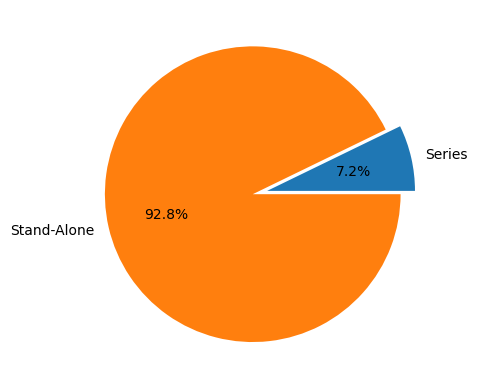

In [59]:
# 18 of the Top 250 rated movies on IMDB are part of a series. 

labels = 'Series', 'Stand-Alone'
sizes = [18, 232]
explode = (.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode)
plt.savefig('Part_of_a_series.png')
plt.show()

<font color='l#6495ED' size='7'>Top 10 Directors</font>

In [60]:
# .value_counts() is a method that returns a series containing counts of unique values in a specified column of the DataFrame.
# In this case it would be the 'director' column. The specified column becomes the index and the corresponding counts of each unique value become the values in the Series.
director_movie_count = df['director'].value_counts()

# Print the results
print(director_movie_count)

director
Alfred Hitchcock                  9
Stanley Kubrick                   8
Martin Scorsese                   7
Christopher Nolan                 7
Billy Wilder                      7
                                 ..
Lenny Abrahamson                  1
Pete Docter, Ronnie Del Carmen    1
Clyde Bruckman, Buster Keaton     1
John McTiernan                    1
Danny Boyle, Loveleen Tandan      1
Name: count, Length: 155, dtype: int64


In [61]:
print("Top 10 Directors:")
print(director_movie_count.head(10))
print("\n")

Top 10 Directors:
director
Alfred Hitchcock     9
Stanley Kubrick      8
Martin Scorsese      7
Christopher Nolan    7
Billy Wilder         7
Steven Spielberg     7
Charles Chaplin      5
Ridley Scott         4
Frank Capra          4
Quentin Tarantino    4
Name: count, dtype: int64




In [62]:
# Split the 'director' column by comma and space
directors_split = df['director'].str.split(', ')

# Explode the lists into separate rows
exploded_directors = directors_split.explode()

# Count occurrences of each director
directors_split_count = exploded_directors.value_counts()

# Display the first ten directors
print("Top 10 Directors by Movie Count:")
print(directors_split_count.head(10))

Top 10 Directors by Movie Count:
director
Alfred Hitchcock     9
Stanley Kubrick      8
Steven Spielberg     7
Martin Scorsese      7
Billy Wilder         7
Christopher Nolan    7
Quentin Tarantino    6
Charles Chaplin      5
Frank Capra          4
Ridley Scott         4
Name: count, dtype: int64


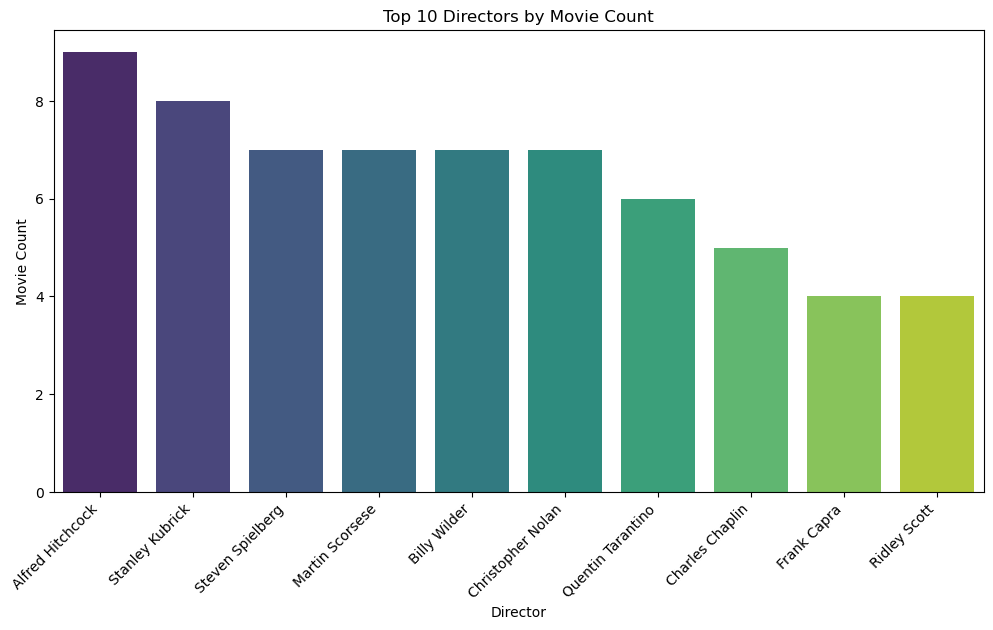

In [63]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=directors_split_count.head(10).index, y=directors_split_count.head(10).values, palette='viridis')
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('Top_10_Directors.png')
plt.show()

In [64]:
# Group by Director
grouped_directors = df.groupby('director')

In [65]:
for director, group in grouped_directors:
    num_movies = len(group)
    print(f"Director: {director}, Number of Movies: {num_movies}")

Director: Adam Elliot, Number of Movies: 1
Director: Alan Parker, Number of Movies: 1
Director: Alejandro González Iñárritu, Number of Movies: 1
Director: Alfred Hitchcock, Number of Movies: 9
Director: Andrew Stanton, Number of Movies: 1
Director: Andrew Stanton, Lee Unkrich, Number of Movies: 1
Director: Barry Levinson, Number of Movies: 1
Director: Billy Bob Thornton, Number of Movies: 1
Director: Billy Wilder, Number of Movies: 7
Director: Bob Clark, Number of Movies: 1
Director: Brian De Palma, Number of Movies: 1
Director: Bryan Singer, Number of Movies: 1
Director: Carol Reed, Number of Movies: 1
Director: Charles Chaplin, Number of Movies: 5
Director: Charles Laughton, Number of Movies: 1
Director: Christopher Nolan, Number of Movies: 7
Director: Clint Eastwood, Number of Movies: 3
Director: Clyde Bruckman, Buster Keaton, Number of Movies: 1
Director: Curtis Hanson, Number of Movies: 1
Director: Damien Chazelle, Number of Movies: 2
Director: Danny Boyle, Number of Movies: 1
Dir

In [66]:
df['director'].explode().value_counts().head(10)

director
Alfred Hitchcock     9
Stanley Kubrick      8
Martin Scorsese      7
Christopher Nolan    7
Billy Wilder         7
Steven Spielberg     7
Charles Chaplin      5
Ridley Scott         4
Frank Capra          4
Quentin Tarantino    4
Name: count, dtype: int64

In [67]:
director_metrics = pd.DataFrame({
    'AverageRating': grouped_directors['imdb_rating'].mean(),
    'TotalMovies': grouped_directors.size()  # Count of movies for each director
})

In [68]:
# Display top 10 directors based on average rating
top_directors_by_rating = director_metrics.sort_values(by='AverageRating', ascending=False).head(10)
print("Top 10 Directors by Average Rating:")
print(top_directors_by_rating)

Top 10 Directors by Average Rating:
                                 AverageRating  TotalMovies
director                                                   
Francis Ford Coppola                      8.90            3
Frank Darabont                            8.90            2
Irvin Kershner                            8.80            1
Peter Jackson                             8.80            3
Lana Wachowski, Lilly Wachowski           8.70            1
George Lucas                              8.70            1
Robert Zemeckis                           8.65            2
Jonathan Demme                            8.60            1
Luc Besson                                8.60            1
Christopher Nolan                         8.60            7


In [69]:
# Display top 10 directors based on total movie count
top_directors_by_count = director_metrics.sort_values(by='TotalMovies', ascending=False).head(10)
print("\nTop 10 Directors by Total Movie Count:")
print(top_directors_by_count)


Top 10 Directors by Total Movie Count:
                   AverageRating  TotalMovies
director                                     
Alfred Hitchcock        8.244444            9
Stanley Kubrick         8.300000            8
Martin Scorsese         8.314286            7
Billy Wilder            8.257143            7
Steven Spielberg        8.357143            7
Christopher Nolan       8.600000            7
Charles Chaplin         8.420000            5
Ridley Scott            8.300000            4
Frank Capra             8.250000            4
Quentin Tarantino       8.425000            4


<font color='l#6495ED' size='7'>How many time actors appear in the top 10</font>

In [70]:
# Split the 'actors' column by comma and space
actors_split = df['actors'].str.split(', ')

# Explode the lists into separate rows
exploded_actors = actors_split.explode()

# Count occurrences of each actor
actors_split_count = exploded_actors.value_counts()

# Display the top 10 actors by appearance
print("Top 10 Actors by Appearance:")
print(actors_split_count.head(10))

Top 10 Actors by Appearance:
actors
Leonardo DiCaprio    8
James Stewart        7
Robert De Niro       7
Harrison Ford        7
Tom Hanks            6
Tom Hardy            5
Paul Newman          5
William Holden       5
Cary Grant           5
Morgan Freeman       4
Name: count, dtype: int64


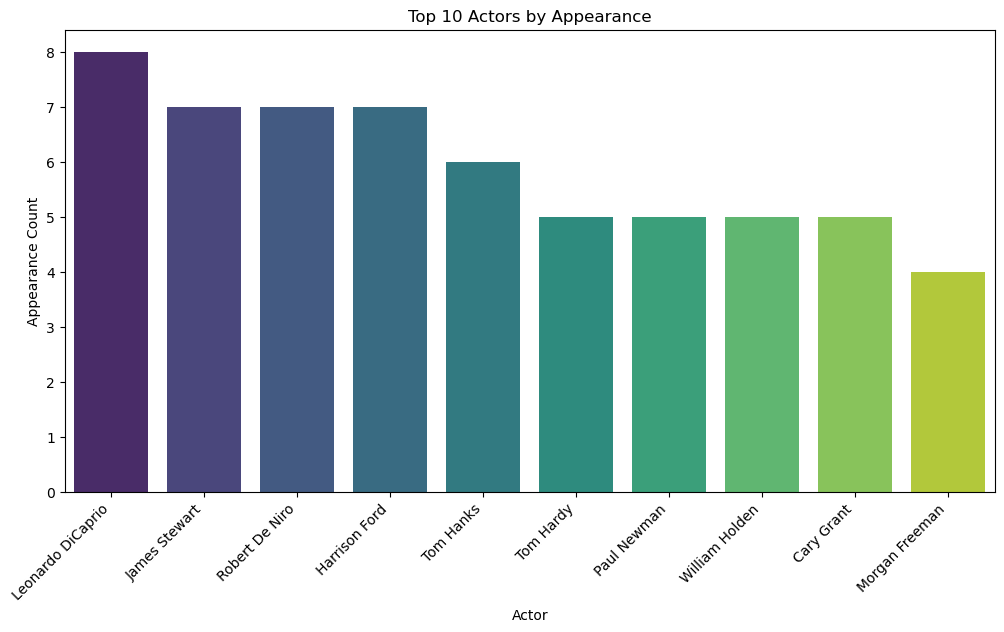

In [71]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=actors_split_count.head(10).index, y=actors_split_count.head(10).values, palette='viridis')
plt.title('Top 10 Actors by Appearance')
plt.xlabel('Actor')
plt.ylabel('Appearance Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('Top_10_Actors.png')
plt.show()

<font color='l#6495ED' size='7'>Does the production company have any relation to the movies rating</font>

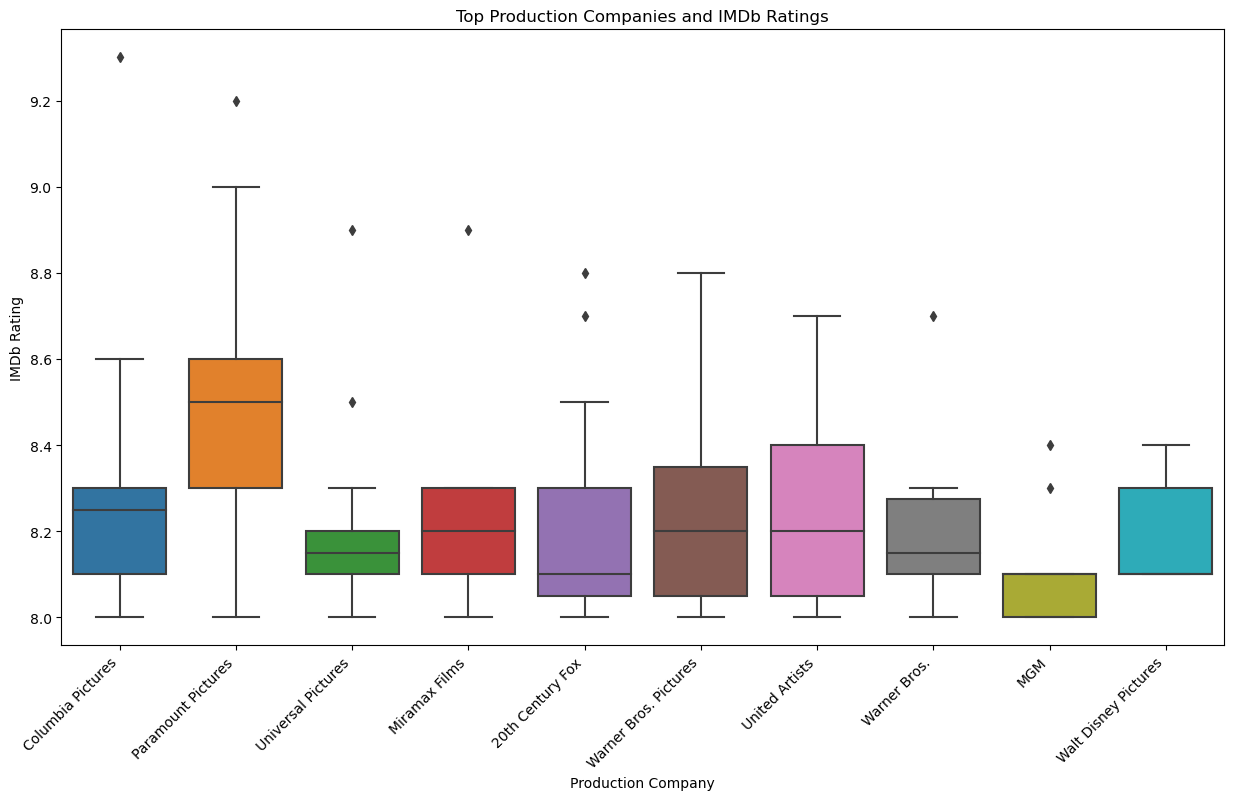

In [72]:
# Choose the top N production companies based on the count of movies or average IMDb rating
top_production_companies = df['production'].value_counts().head(10).index

# Filter the DataFrame for the top production companies
filtered_df = df[df['production'].isin(top_production_companies)]

# Plot a boxplot to visualize the relationship
plt.figure(figsize=(15, 8))
sns.boxplot(x='production', y='imdb_rating', data=filtered_df)
plt.title('Top Production Companies and IMDb Ratings')
plt.xlabel('Production Company')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels for better visibility
plt.savefig('Top_10_Productions.png')
plt.show()

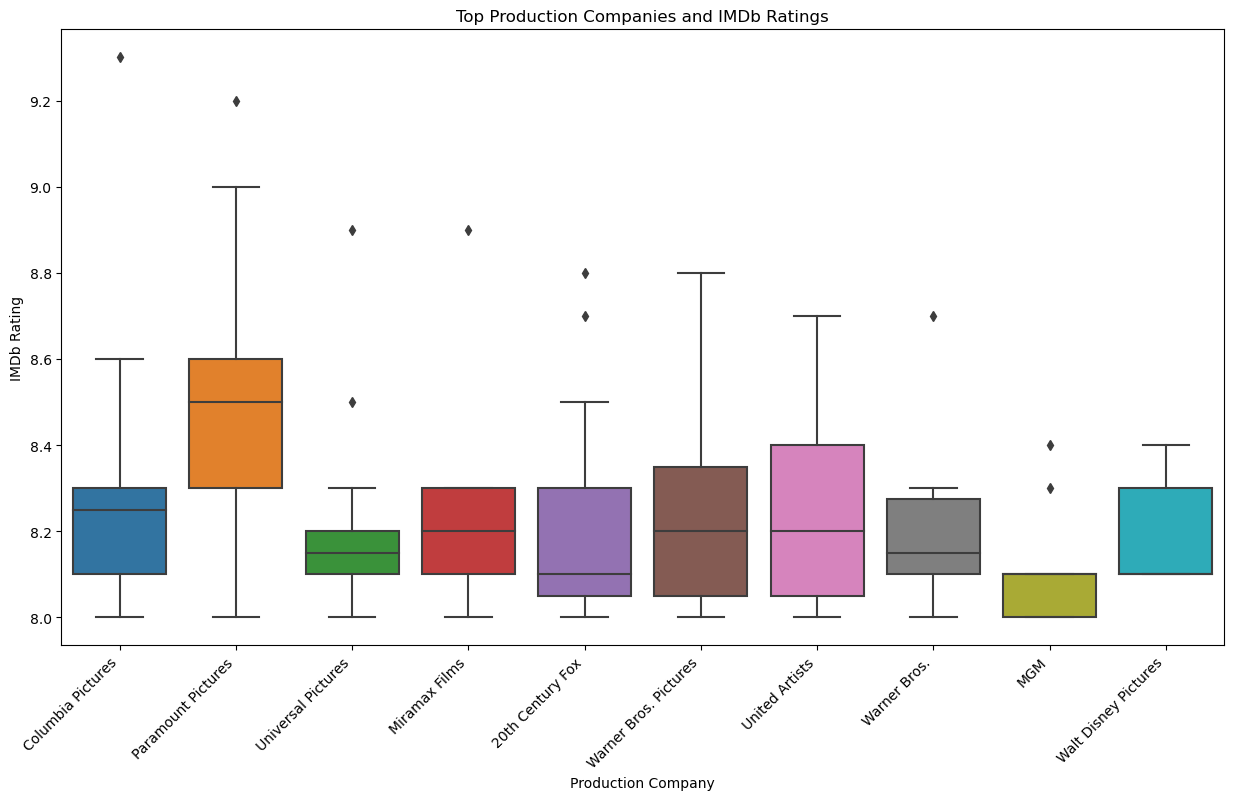

In [73]:
top_production_companies = df['production'].value_counts().head(10).index

# Filter the DataFrame for the top production companies
filtered_df = df[df['production'].isin(top_production_companies)]

# Create a boxplot to visualize the relationship
plt.figure(figsize=(15, 8))
sns.boxplot(x='production', y='imdb_rating', data=filtered_df)
plt.title('Top Production Companies and IMDb Ratings')
plt.xlabel('Production Company')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels for better visibility
plt.savefig('Top_10_rating_productions.png')
plt.show()

C:\Users\Joseph Haas\AppData\Local\Temp\ipykernel_15816\4123583004.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='production', y='imdb_rating', data=filtered_df, jitter=True, palette='viridis')


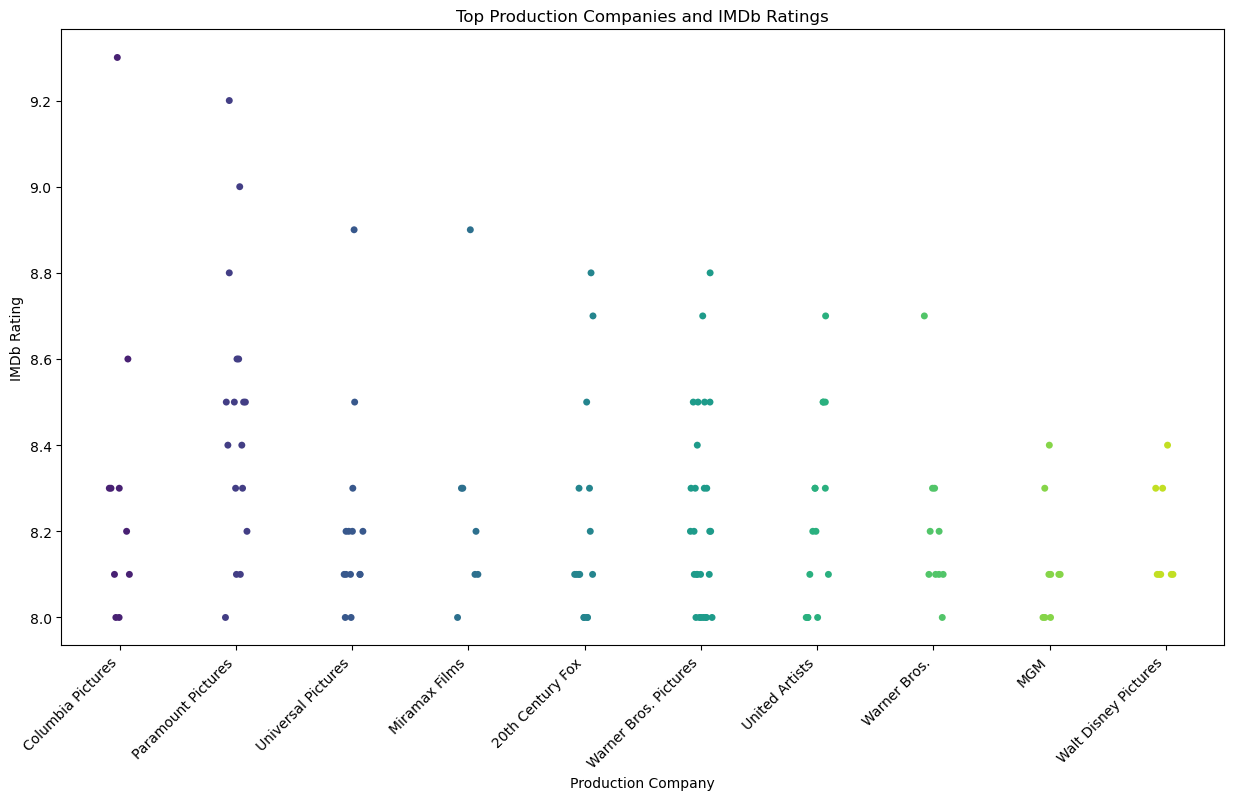

In [74]:
# Choose the top N production companies based on the count of movies or average IMDb rating
top_production_companies = df['production'].value_counts().head(10).index

# Filter the DataFrame for the top production companies
filtered_df = df[df['production'].isin(top_production_companies)]

# Create a strip plot to visualize the relationship
plt.figure(figsize=(15, 8))
sns.stripplot(x='production', y='imdb_rating', data=filtered_df, jitter=True, palette='viridis')
plt.title('Top Production Companies and IMDb Ratings')
plt.xlabel('Production Company')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels for better visibility
plt.savefig('Top_productions_scatter.png')
plt.show()

# 

<font color='Purple' size='7'>How does release year correlate with Metascore ratings?</font>

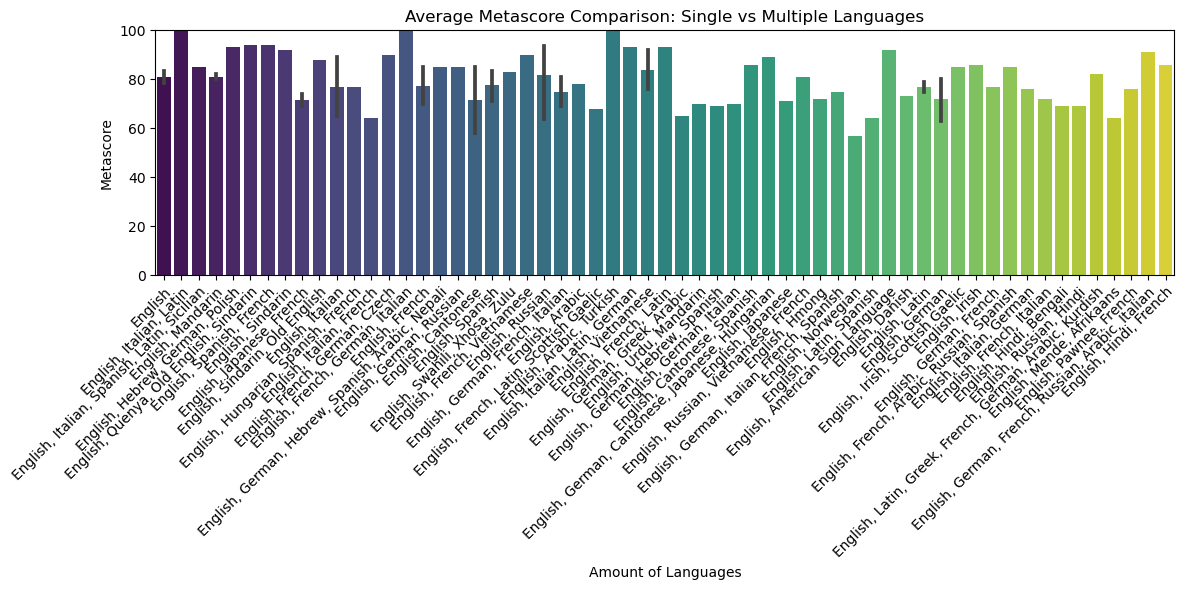

In [75]:
# Database connection
con = psycopg2.connect(
    database="imdb_top250_movies",
    user="postgres",
    password="postgres",
    host="localhost",
    port='5432'
)

cursor_obj = con.cursor()

# Fetch data from the database
cursor_obj.execute("SELECT * FROM imdb_top250_movies")  # Replace with your actual table name
result_data = cursor_obj.fetchall()

# Get column names from the cursor description
column_names = [desc[0] for desc in cursor_obj.description]

# Create a DataFrame with the result data and column names
df = pd.DataFrame(result_data, columns=column_names)

# Close the cursor and connection
cursor_obj.close()
con.close()

# Plotting
plt.figure(figsize=(12, 6))

# Check if 'language' and 'metascore' are present in the DataFrame columns
if 'language' in df.columns and 'metascore' in df.columns:
    # Filter out rows where Metascore is not available
    df_filtered = df.dropna(subset=['metascore'])

    # Adjust y-axis scale
    plt.ylim(0, 100)  # Adjust the y-axis limits as needed

    # Create a bar plot comparing average metascores for movies with different language counts
    sns.barplot(x='language', y='metascore', data=df_filtered, palette='viridis')

    # Increase spacing between x-axis labels
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)
    
    # Explicitly display the plot
    plt.title('Average Metascore Comparison: Single vs Multiple Languages')
    plt.xlabel('Amount of Languages')
    plt.ylabel('Metascore')
    plt.tight_layout()
    plt.show()

else:
    print("Columns 'language' and 'metascore' are not present in the DataFrame.")

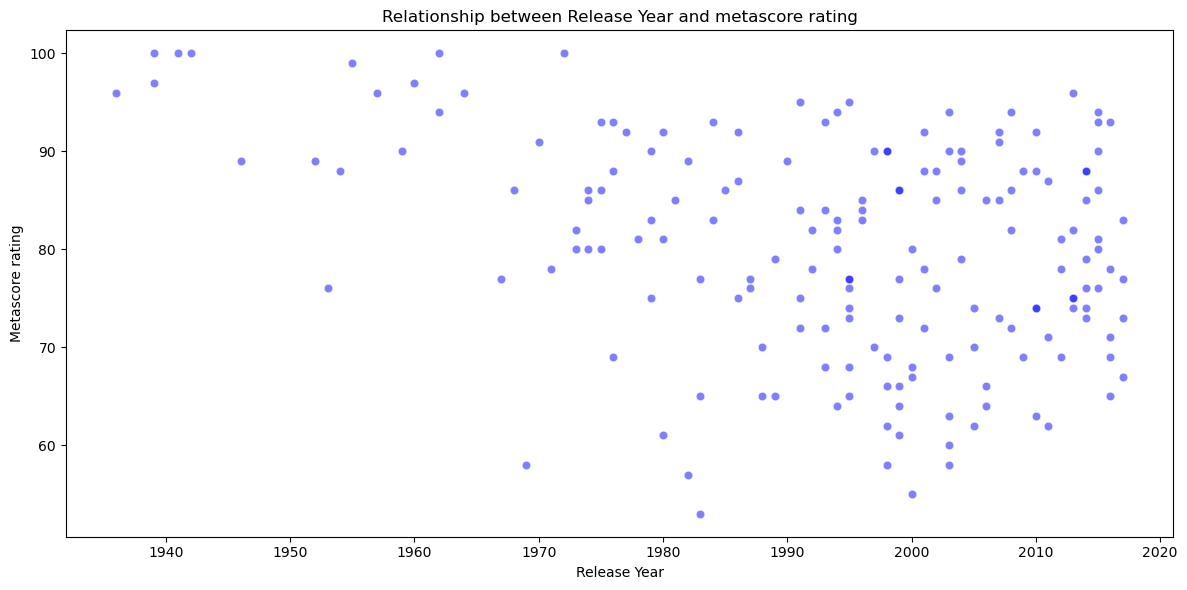

In [76]:
# Database connection
con = psycopg2.connect(
    database="imdb_top250_movies",
    user="postgres",
    password="postgres",
    host="localhost",
    port='5432'
)

cursor_obj = con.cursor()

# Fetch data from the database
cursor_obj.execute("SELECT * FROM imdb_top250_movies")  # Replace with your actual table name
result_data = cursor_obj.fetchall()

# Get column names from the cursor description
column_names = [desc[0] for desc in cursor_obj.description]

# Create a DataFrame with the result data and column names
df = pd.DataFrame(result_data, columns=column_names)

# Close the cursor and connection
cursor_obj.close()
con.close()

# Plotting
plt.figure(figsize=(12, 6))

# Check if 'start_year' and 'imdbrating' are present in the DataFrame columns
if 'year' in df.columns and 'metascore' in df.columns:
    # Create a scatter plot to show the relationship between release year and IMDb rating
    sns.scatterplot(x='year', y='metascore', data=df, color='blue', alpha=0.5)

    # Explicitly display the plot
    plt.title('Relationship between Release Year and metascore rating')
    plt.xlabel('Release Year')
    plt.ylabel('Metascore rating')
    plt.tight_layout()
    plt.show()

else:
    print("Columns 'start_year' and 'metascore rating' are not present in the DataFrame.")


<font color='Purple' size='7'>Which production companies create the highest rated films?</font>

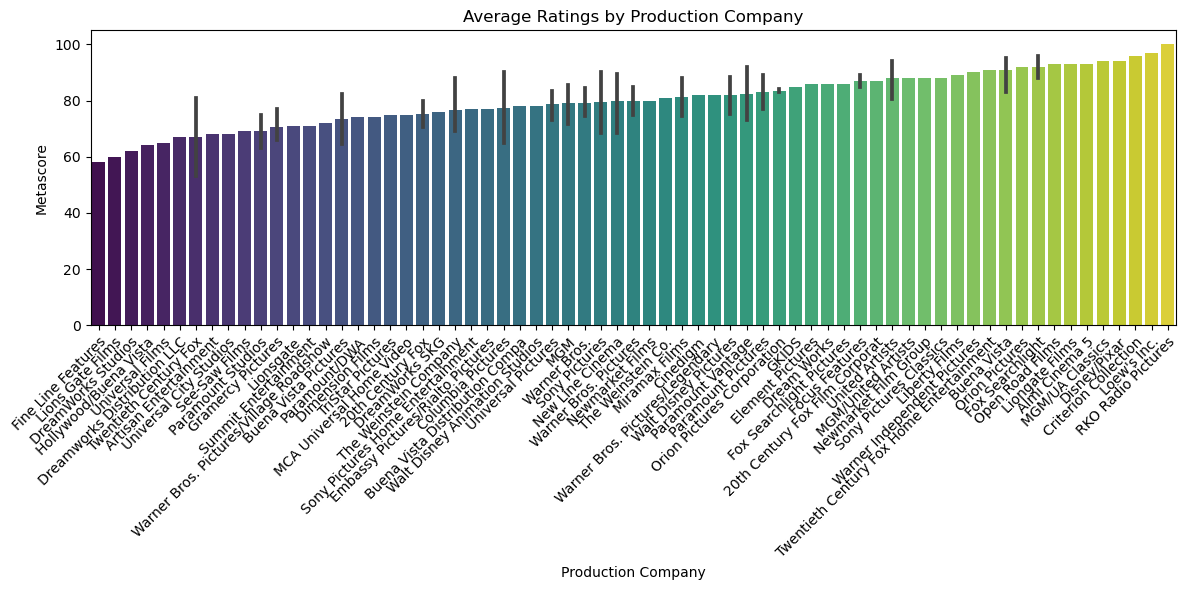

In [77]:
# Database connection
con = psycopg2.connect(
    database="imdb_top250_movies",
    user="postgres",
    password="postgres",
    host="localhost",
    port='5432'
)

cursor_obj = con.cursor()

# Fetch data from the database
cursor_obj.execute("SELECT * FROM imdb_top250_movies WHERE metascore IS NOT NULL")  # Filter out rows without Metascore
result_data = cursor_obj.fetchall()

# Get column names from the cursor description
column_names = [desc[0] for desc in cursor_obj.description]

# Create a DataFrame with the result data and column names
df = pd.DataFrame(result_data, columns=column_names)

# Close the cursor and connection
cursor_obj.close()
con.close()

# Plotting
plt.figure(figsize=(12, 6))

# Check if 'production' and 'metascore' are present in the DataFrame columns
if 'production' in df.columns and 'metascore' in df.columns:
    # Create a bar plot to compare average ratings for different production companies
    sns.barplot(x='production', y='metascore', data=df, palette='viridis', order=df.groupby('production')['metascore'].mean().sort_values().index)

    # Explicitly display the plot
    plt.title('Average Ratings by Production Company')
    plt.xlabel('Production Company')
    plt.ylabel('Metascore')
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)
    plt.tight_layout()
    plt.show()

else:
    print("Columns 'production' and 'metascore' are not present in the DataFrame.")

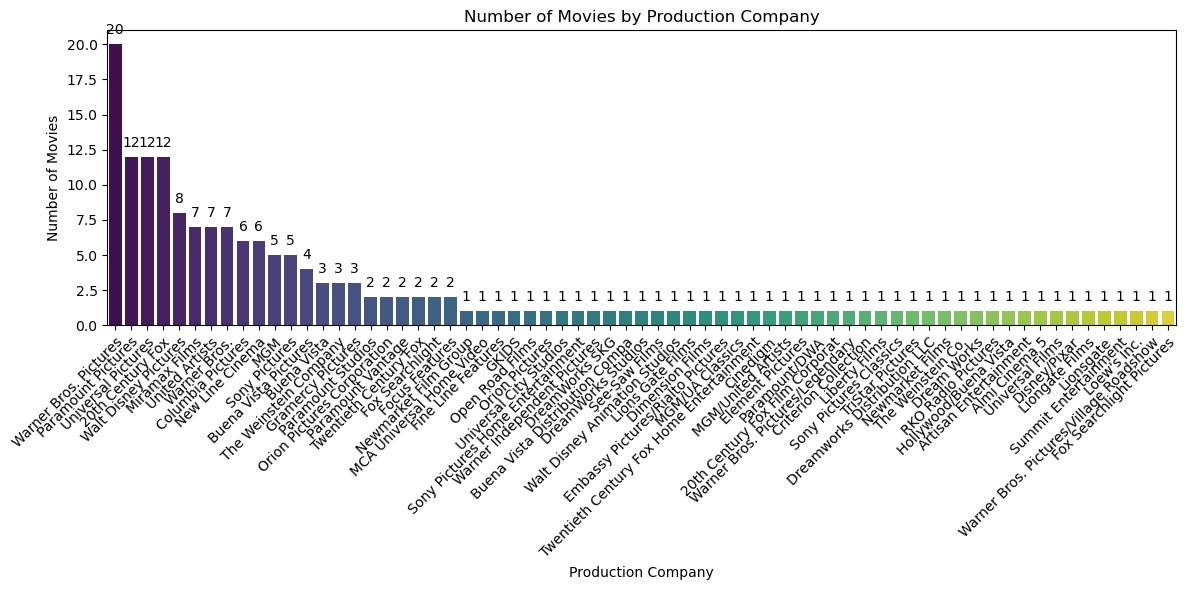

In [78]:
# Database connection
con = psycopg2.connect(
    database="imdb_top250_movies",
    user="postgres",
    password="postgres",
    host="localhost",
    port='5432'
)

cursor_obj = con.cursor()

# Fetch data from the database
cursor_obj.execute("SELECT * FROM imdb_top250_movies WHERE metascore IS NOT NULL")  # Filter out rows without Metascore
result_data = cursor_obj.fetchall()

# Get column names from the cursor description
column_names = [desc[0] for desc in cursor_obj.description]

# Create a DataFrame with the result data and column names
df = pd.DataFrame(result_data, columns=column_names)

# Close the cursor and connection
cursor_obj.close()
con.close()

# Plotting
plt.figure(figsize=(12, 6))

# Check if 'production' is present in the DataFrame columns
if 'production' in df.columns:
    # Create a count plot to show the number of movies produced by each production company
    sns.countplot(x='production', data=df, palette='viridis', order=df['production'].value_counts().index)

    # Annotate each bar with its count
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Explicitly display the plot
    plt.title('Number of Movies by Production Company')
    plt.xlabel('Production Company')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)
    plt.tight_layout()
    plt.show()

else:
    print("Column 'production' is not present in the DataFrame.")


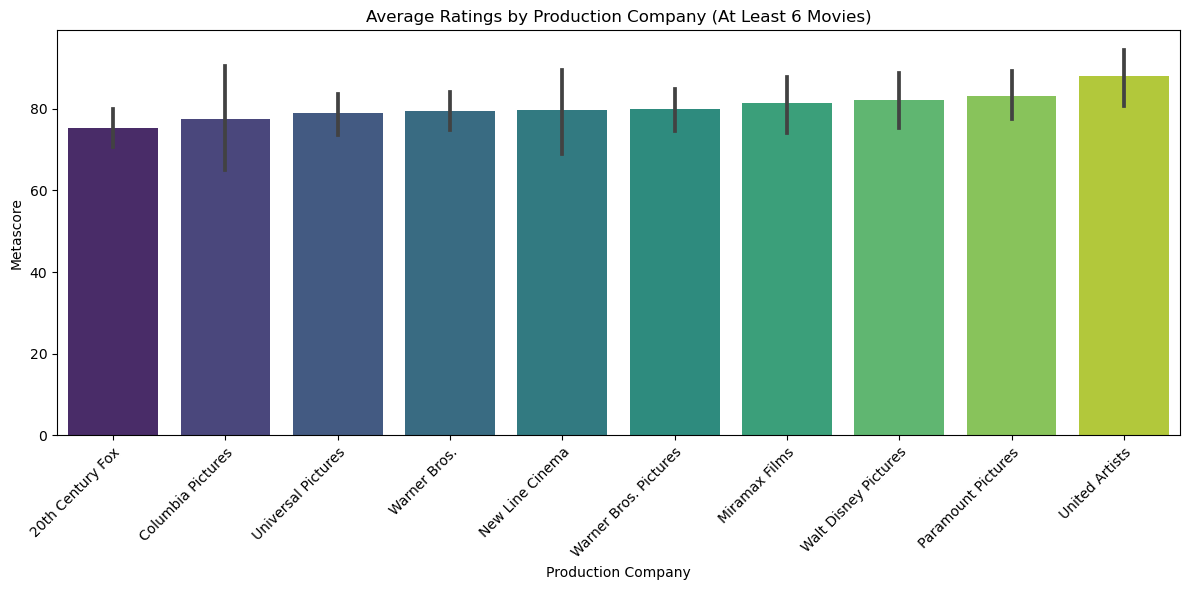

In [79]:
# Database connection
con = psycopg2.connect(
    database="imdb_top250_movies",
    user="postgres",
    password="postgres",
    host="localhost",
    port='5432'
)

cursor_obj = con.cursor()

# Fetch data from the database
cursor_obj.execute("SELECT * FROM imdb_top250_movies WHERE metascore IS NOT NULL")  # Filter out rows without Metascore
result_data = cursor_obj.fetchall()

# Get column names from the cursor description
column_names = [desc[0] for desc in cursor_obj.description]

# Create a DataFrame with the result data and column names
df = pd.DataFrame(result_data, columns=column_names)

# Close the cursor and connection
cursor_obj.close()
con.close()

# Count the number of movies per production company
movie_counts = df['production'].value_counts()

# Filter production companies with at least 6 movies
selected_companies = movie_counts[movie_counts >= 6].index
df_filtered = df[df['production'].isin(selected_companies)]

# Plotting
plt.figure(figsize=(12, 6))

# Check if 'production' and 'metascore' are present in the DataFrame columns
if 'production' in df.columns and 'metascore' in df.columns:
    # Create a bar plot to compare average ratings for different production companies
    sns.barplot(x='production', y='metascore', data=df_filtered, palette='viridis', order=df_filtered.groupby('production')['metascore'].mean().sort_values().index)

    # Explicitly display the plot
    plt.title('Average Ratings by Production Company (At Least 6 Movies)')
    plt.xlabel('Production Company')
    plt.ylabel('Metascore')
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)
    plt.tight_layout()
    plt.show()

else:
    print("Columns 'production' and 'metascore' are not present in the DataFrame.")

<font color='Pink' size='7'>Genre Breakdown of the top 250</font>

In [80]:
# Does genre affect viability to make top 250 - Joe

genre = df[['title', 'runtime' ,'genre', 'awards', 'metascore', 'imdbrating']]

genre.head()



,title,runtime,genre,awards,metascore,imdbrating
0,The Shawshank Redemption,142 min,"Crime, Drama",Nominated for 7 Oscars. Another 19 wins & 30 n...,80,9.3
1,The Godfather,175 min,"Crime, Drama",Won 3 Oscars. Another 23 wins & 27 nominations.,100,9.2
2,The Godfather: Part II,202 min,"Crime, Drama",Won 6 Oscars. Another 10 wins & 20 nominations.,85,9.0
3,The Dark Knight,152 min,"Action, Crime, Drama",Won 2 Oscars. Another 151 wins & 153 nominations.,82,9.0
4,12 Angry Men,96 min,"Crime, Drama",Nominated for 3 Oscars. Another 16 wins & 8 no...,96,8.9


In [81]:
genre_breakdown = genre.groupby('genre')['title'].nunique()

genre_breakdown


genre
Action, Adventure             2
Action, Adventure, Comedy     1
Action, Adventure, Drama      1
Action, Adventure, Fantasy    6
Action, Adventure, Sci-Fi     6
                             ..
Horror, Mystery, Thriller     1
Horror, Sci-Fi                1
Mystery, Sci-Fi, Thriller     1
Mystery, Thriller             2
Sci-Fi, Thriller              1
Name: title, Length: 88, dtype: int64

In [82]:
genre_count1 = genre['genre'].value_counts()

genre_count1.head(25)

genre
Drama                           14
Crime, Drama                    11
Crime, Drama, Thriller           7
Animation, Adventure, Comedy     7
Action, Adventure, Fantasy       6
Action, Adventure, Sci-Fi        6
Biography, Drama, History        6
Adventure, Drama, Fantasy        5
Biography, Drama                 5
Crime, Drama, Mystery            5
Drama, War                       5
Adventure, Drama, Thriller       3
Comedy                           3
Drama, Romance                   3
Action, Sci-Fi                   3
Comedy, Crime                    3
Action, Crime, Drama             2
Drama, Sport                     2
Animation, Adventure, Family     2
Action, Thriller                 2
Adventure, Family, Fantasy       2
Drama, Western                   2
Adventure, Biography, Drama      2
Mystery, Thriller                2
Comedy, Drama                    2
Name: count, dtype: int64

In [83]:
# Get all unique genres
unique_genres = genre['genre'].str.split(', ').explode().unique()

# Create new columns for each unique genre
for genre_col in unique_genres:
    genre_col_name = genre_col.replace(' ', '_')  # Replace spaces with underscores
    genre[genre_col_name] = genre['genre'].apply(lambda x: genre_col in x.split(', '))

# Count the occurrences of each unique genre
genre_count = genre.iloc[:, -len(unique_genres):].sum()

# Display the result with genre names and counts
for genre, count in zip(unique_genres, genre_count):
    print(f"{genre}: {count}")

Crime: 39
Drama: 117
Action: 32
Biography: 21
History: 11
Adventure: 49
Fantasy: 18
Comedy: 28
Romance: 10
Sci-Fi: 25
Mystery: 15
Family: 8
Thriller: 30
War: 8
Horror: 5
Music: 5
Animation: 12
Western: 3
Sport: 4
Film-Noir: 1


C:\Users\Joseph Haas\AppData\Local\Temp\ipykernel_15816\822064201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre[genre_col_name] = genre['genre'].apply(lambda x: genre_col in x.split(', '))
C:\Users\Joseph Haas\AppData\Local\Temp\ipykernel_15816\822064201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre[genre_col_name] = genre['genre'].apply(lambda x: genre_col in x.split(', '))
C:\Users\Joseph Haas\AppData\Local\Temp\ipykernel_15816\822064201.py:7: SettingWithCopyWarning: 
A value is tr

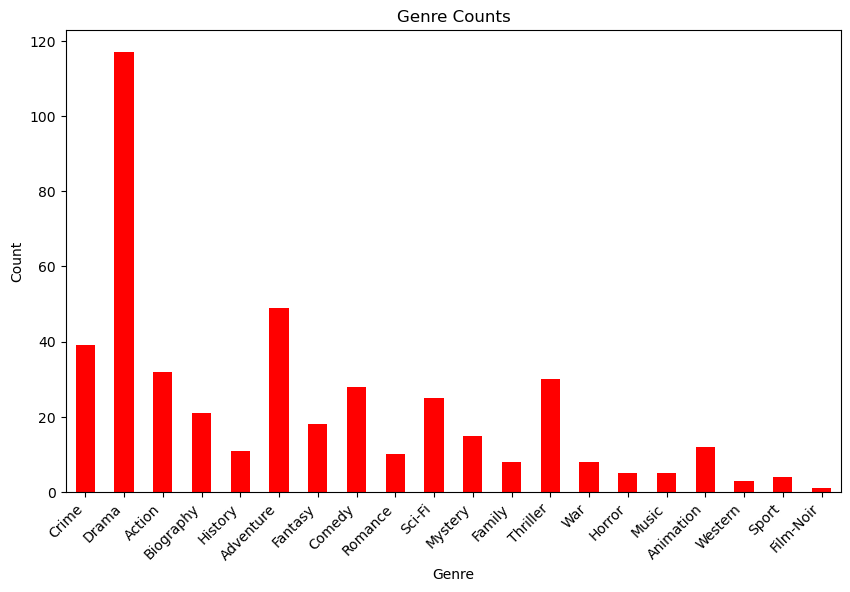

In [84]:
plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar', color='red')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('Genre_count.png')
plt.show()

<font color='Pink' size='7'>Runtime average based on Genre</font>

In [85]:
# Does genre affect the runtime in the top 250- Joe

runtime = df.groupby('runtime')['genre'].count()

runtime

runtime
100 min    1
101 min    2
102 min    4
103 min    2
106 min    3
          ..
94 min     3
95 min     2
96 min     3
98 min     4
99 min     2
Name: genre, Length: 88, dtype: int64

In [86]:
if not pd.api.types.is_numeric_dtype(df['runtime']):
    # If not, remove 'min' and convert to numeric
    df['runtime'] = pd.to_numeric(df['runtime'].str.replace('min', ''))

# Split genres and create a new DataFrame with exploded genres
df_expanded = df.assign(genre=df['genre'].str.split(', ')).explode('genre')

# Group by 'genre' and calculate the mean of 'runtime'
genre_avg_runtime = df_expanded.groupby('genre')['runtime'].mean().sort_values(ascending=False)

# Print the result
print(genre_avg_runtime)

genre
History      168.363636
War          146.000000
Biography    144.095238
Drama        136.358974
Crime        134.692308
Fantasy      132.777778
Music        132.600000
Action       131.375000
Sport        130.250000
Sci-Fi       128.880000
Adventure    128.489796
Romance      127.700000
Western      127.000000
Mystery      124.800000
Thriller     124.666667
Horror       120.600000
Comedy       108.071429
Family        98.250000
Animation     94.666667
Film-Noir     92.000000
Name: runtime, dtype: float64


In [87]:

# Convert the result to a DataFrame
result_df = pd.DataFrame(genre_avg_runtime)

# Reset the index to make 'genre' a column
result_df.reset_index(inplace=True)

# Print the result DataFrame
result_df.columns = ['Genre', 'Runtime Average']

result_df

,Genre,Runtime Average
0,History,168.363636
1,War,146.000000
2,Biography,144.095238
3,Drama,136.358974
4,Crime,134.692308
5,Fantasy,132.777778
6,Music,132.600000
7,Action,131.375000
8,Sport,130.250000
9,Sci-Fi,128.880000


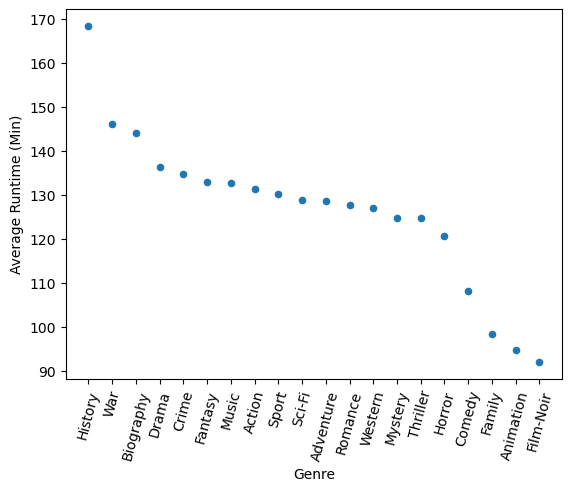

In [88]:
# Scatter Plot

result_df.plot(kind='scatter', x= 'Genre', y= 'Runtime Average', ylabel='Average Runtime (Min)')
plt.xticks(rotation=75)
plt.savefig('Genre_runtime.png')
plt.show()

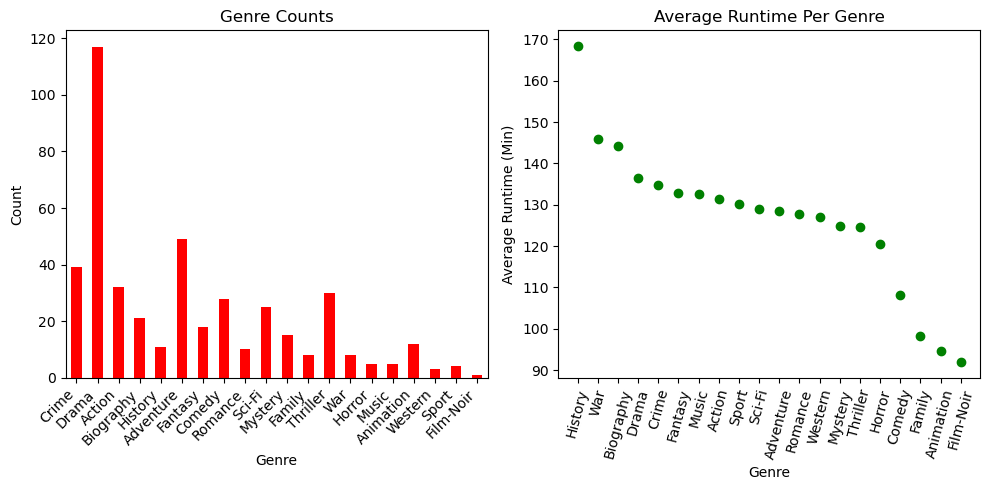

In [89]:
# Bar chart (Movie Genre Count)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
genre_count.plot(kind='bar', color='red')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Scatter plot

plt.subplot(1, 2, 2)
plt.scatter(result_df['Genre'], result_df['Runtime Average'], color='green')
plt.title('Average Runtime Per Genre')
plt.xlabel('Genre')
plt.xticks(rotation=75)
plt.ylabel('Average Runtime (Min)')




plt.tight_layout()
plt.savefig('combined_graphs.png')
plt.show()

<font color='Pink' size='7'>Visualization Demonstration of the top 250</font>

In [90]:
# How many time certain director appear in top 250 - Joe

df.head(5)


,num,title,year,released,runtime,genre,director,writer,actors,plot,language,country,awards,metascore,imdbrating,imdbvotes,production
0,1,The Shawshank Redemption,1994,1994-10-14,142,"Crime, Drama",Frank Darabont,Stephen King (short story Rita Hayworth and Sh...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,80,9.3,"1,825,626",Columbia Pictures
1,2,The Godfather,1972,1972-03-24,175,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,100,9.2,"1,243,444",Paramount Pictures
2,3,The Godfather: Part II,1974,1974-12-20,202,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,85,9.0,"856,870",Paramount Pictures
3,4,The Dark Knight,2008,2008-07-18,152,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,82,9.0,"1,802,351",Warner Bros. Pictures/Legendary
4,5,12 Angry Men,1957,1957-04-01,96,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,96,8.9,"494,215",Criterion Collection


In [91]:
director_df = df[['title','genre', 'director', 'writer', 'actors']]

director_df.head(5)

,title,genre,director,writer,actors
0,The Shawshank Redemption,"Crime, Drama",Frank Darabont,Stephen King (short story Rita Hayworth and Sh...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ..."
2,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert..."
3,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M..."
4,12 Angry Men,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G...."


In [92]:
director_expanded = director_df.assign(director=director_df['director'].str.split(', ')).explode('director')

director_count = director_expanded.groupby('director')['title'].count().sort_values(ascending=False)

director_count

director
Christopher Nolan     7
Martin Scorsese       7
Steven Spielberg      7
Quentin Tarantino     6
Stanley Kubrick       5
                     ..
Giuseppe Tornatore    1
George Miller         1
George Lucas          1
Gavin O'Connor        1
Jonathan Demme        1
Name: title, Length: 131, dtype: int64

In [93]:
result_director = pd.DataFrame(director_count)

result_director.reset_index(inplace=True)

result_director.columns = ['Director', 'Movies in the top 250']

result_director

# result_director.to_csv('result_director.csv', index=False)

,Director,Movies in the top 250
0,Christopher Nolan,7
1,Martin Scorsese,7
2,Steven Spielberg,7
3,Quentin Tarantino,6
4,Stanley Kubrick,5
...,...,...
126,Giuseppe Tornatore,1
127,George Miller,1
128,George Lucas,1
129,Gavin O'Connor,1


In [94]:

writer_expanded = director_df.assign(writer=director_df['writer'].str.split(', ')).explode('writer')

writer_expanded['writer'] = writer_expanded['writer'].str.extract(r'([^\(\)]+)', expand=False).str.strip()

writer_count = writer_expanded.groupby('writer')['title'].count().sort_values(ascending=False)

print(writer_count)

writer
Christopher Nolan    9
Andrew Stanton       8
Quentin Tarantino    8
George Lucas         8
Pete Docter          7
                    ..
J.K. Rowling         1
J.J. Abrams          1
Irvine Welsh         1
Irene Mecchi         1
Zak Penn             1
Name: title, Length: 370, dtype: int64


In [95]:
result_writer = pd.DataFrame(writer_count)

result_writer.reset_index(inplace=True)

result_writer.columns = ['Writer', 'Movies in the top 250']

result_writer

# result_writer.to_csv('result_writer.csv', index=False)

,Writer,Movies in the top 250
0,Christopher Nolan,9
1,Andrew Stanton,8
2,Quentin Tarantino,8
3,George Lucas,8
4,Pete Docter,7
...,...,...
365,J.K. Rowling,1
366,J.J. Abrams,1
367,Irvine Welsh,1
368,Irene Mecchi,1


In [96]:
actors_expanded = director_df.assign(actors=director_df['actors'].str.split(', ')).explode('actors')

actors_count = actors_expanded.groupby('actors')['title'].count().sort_values(ascending=False)

actors_count

actors
Leonardo DiCaprio     8
Harrison Ford         7
Robert De Niro        6
Tom Hanks             6
Tom Hardy             5
                     ..
Harvey Keitel         1
Hartley Power         1
Harry Dean Stanton    1
Harriet Andersson     1
Jon Voight            1
Name: title, Length: 558, dtype: int64

In [97]:
result_actors = pd.DataFrame(actors_count)

result_actors.reset_index(inplace=True)

result_actors.columns = ['Actors', 'Movies in the top 250']

result_actors

# result_actors.to_csv('result_actors.csv', index=False)

,Actors,Movies in the top 250
0,Leonardo DiCaprio,8
1,Harrison Ford,7
2,Robert De Niro,6
3,Tom Hanks,6
4,Tom Hardy,5
...,...,...
553,Harvey Keitel,1
554,Hartley Power,1
555,Harry Dean Stanton,1
556,Harriet Andersson,1


In [98]:
gui = show(result_actors,result_director,result_writer,df)


PandasGUI INFO — pandasgui.gui — Opening PandasGUI
